# Machine Learning I

In this notebook we'll start learning a few machine learning techniques and how to implement them in python. Machine learning has become very trendy lately, and for those of you interested in jobs outside of academia this is an excellent tool to have in your belt. The field of machine learning covers a wide array of techniques and sub-fields. We will not possibly be able to cover all of it in this and the next notebook, but we will cover a few of the most common techniques.

Note most of the content in this and the following notebook, Machine Learning II, comes from [__Introduction to Machine Learning with Python__ ](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413/ref=sr_1_3?ie=UTF8&qid=1533953050&sr=8-3&keywords=introduction+to+machine+learning+with+python) and [__Hands-On Machine Learning with Scikit-Learn & TensorFlow__](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_4?ie=UTF8&qid=1533953050&sr=8-4&keywords=introduction+to+machine+learning+with+python). I believe both of these are readily available online.

In order to do anything with machine learning we'll need data. Let's start by making sure we can get some.

## `pandas`

Run the following line of code.

In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Some of you may need to use pip install to install sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

We will now see how we can use `pandas` to explore a datadet before we use machine learning techniques.

`pandas` stores data in two forms:
1. A `pandas Series`
2. A `pandas DataFrame`

### `Series`

You can think of a `Series` as a `pandas` version of an `np.Array`. We can create one in the following way.

In [2]:
SampleSeries1 = pd.Series([1,2,3,4,5,6,8,9,11])

print "This is SampleSeries1"
print SampleSeries1
print "\n"

SampleSeries2 = pd.Series(np.arange(0,11,.5))

print "This is SampleSeries2"
print SampleSeries2

This is SampleSeries1
0     1
1     2
2     3
3     4
4     5
5     6
6     8
7     9
8    11
dtype: int64


This is SampleSeries2
0      0.0
1      0.5
2      1.0
3      1.5
4      2.0
5      2.5
6      3.0
7      3.5
8      4.0
9      4.5
10     5.0
11     5.5
12     6.0
13     6.5
14     7.0
15     7.5
16     8.0
17     8.5
18     9.0
19     9.5
20    10.0
21    10.5
dtype: float64


As we can see each `pandas Series` is a single column of values. Series also have a number of built in functions that you can learn about [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html). For example, we can make a histogram of our `Series`.

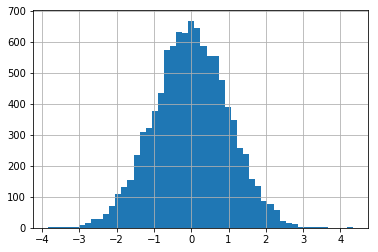

In [3]:
SampleSeries3 = pd.Series(np.random.randn(10000))

SampleSeries3.hist(bins=50)
plt.show()

In [4]:
# run this code to delete the three series from our computer's memory
del SampleSeries1
del SampleSeries2
del SampleSeries3

### `DataFrames`

Now we'll look at `panda`'s second object, the `DataFrame`. We saw these before in the __More Plotting__ notebook. Let's return to that line of code.

In [5]:
AllPokemon = pd.read_csv('Data\AllPokemon.csv',index_col = 0)

What did the above code do?

`pd.read_csv('Data\AllPokemon.csv',index_col = 0)` told our computer that we want to create a `DataFrame` from the comma separated data file called AllPokemon. Let's see how we can explore what our `DataFrame` is all about.

In [6]:
# We can see what our columns are with .columns
AllPokemon.columns

Index([u'Name', u'Type 1', u'Type 2', u'Total', u'HP', u'Attack', u'Defense',
       u'Sp. Atk', u'Sp. Def', u'Speed', u'Generation', u'Legendary'],
      dtype='object')

In [7]:
# What type are each of our variables? Use .dtypes()
AllPokemon.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [8]:
# .head(n) lets you see the first n rows of the dataframe
AllPokemon.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [9]:
# .tail(n) lets you see the last n rows of the dataframe
AllPokemon.tail(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [10]:
# .sample(n) produces a random sample of the rows of your dataframe of size n
AllPokemon.sample(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
374,Beldum,Steel,Psychic,300,40,55,80,35,60,30,3,False
321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
410,Shieldon,Rock,Steel,350,30,42,118,42,88,30,4,False
157,Typhlosion,Fire,NaN,534,78,84,78,109,85,100,2,False
18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
590,Foongus,Grass,Poison,294,69,55,45,55,55,15,5,False
307,Meditite,Fighting,Psychic,280,30,40,55,40,55,60,3,False


In [11]:
# We can summarize our numerical data with .describe()
AllPokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [12]:
# We can select a particular column(s) by putting in the column name(s)

# Will return only the Name column 
print AllPokemon['Name'].head(5)
print "\n"

# Will return Name, Attack, Defense, and Speed
print AllPokemon[['Name','Attack','Defense','Speed']].head(5)

#
1                Bulbasaur
2                  Ivysaur
3                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object


                    Name  Attack  Defense  Speed
#                                               
1              Bulbasaur      49       49     45
2                Ivysaur      62       63     60
3               Venusaur      82       83     80
3  VenusaurMega Venusaur     100      123     80
4             Charmander      52       43     65


In [13]:
# We can also subset DataFrames by logical statements

# Which pokemon have  Attack higher than 50?
print AllPokemon[ AllPokemon['Attack'] > 50 ].head(10)
print "\n"

# Which pokemon are Legendary?
print AllPokemon[ AllPokemon['Legendary'] == True].head(5)

                        Name Type 1  Type 2  Total  HP  Attack  Defense  \
#                                                                         
2                    Ivysaur  Grass  Poison    405  60      62       63   
3                   Venusaur  Grass  Poison    525  80      82       83   
3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4                 Charmander   Fire     NaN    309  39      52       43   
5                 Charmeleon   Fire     NaN    405  58      64       58   
6                  Charizard   Fire  Flying    534  78      84       78   
6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
8                  Wartortle  Water     NaN    405  59      63       80   
9                  Blastoise  Water     NaN    530  79      83      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
#                                              

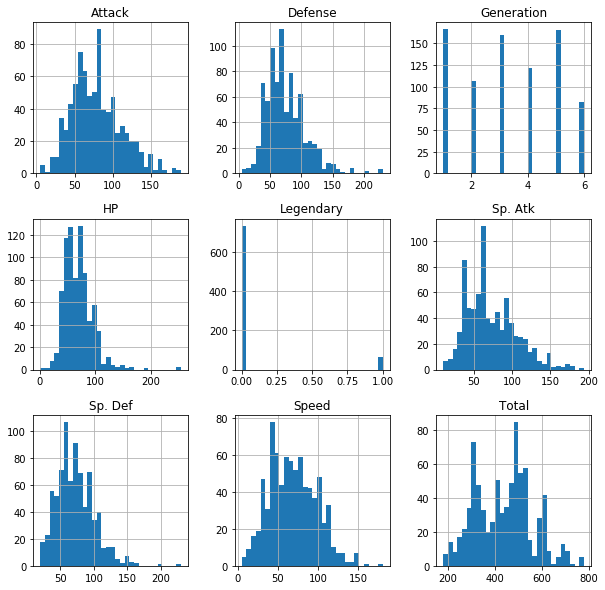

In [14]:
# We can again get a histogram of all the numeric stats using .hist()
AllPokemon.hist(bins = 30,figsize = (10,10))
plt.show()


In [15]:
del AllPokemon

This should be all the `pandas` info that we need to perform some machine learning techniques. Should any other information be needed, we will address it at that time.

We're now ready to do some machine learning. :-D

## What is Machine Learning?

The basic idea of machine learning is to use algorithms to analyze and learn from data. It's called machine learning because we can imagine sticking our data set in front of a machine to allow it to "learn" from our data. Machine learning applies algorithms to data to recognize patterns and make predictions. This is by no means a precise definition of machine learning and it likely infuriates some segment of individuals that conduct machine learning for a living. However, this is the way I currently understand the field.

## Supervised Learning vs. Unsupervised Learning

Much of machine learning can be broken down into two broad categories:
1. Supervised Learning,
2. Unsupervised Learning.

We'll spend the rest of this notebook discussing surpervised learning and touch on unsupervised learning in the following notebook, __Machine Learning II__.

### Supervised Learning

Surpervised learning is a way in which machines learn to provide output predictions from data input by "looking" at existing input-output pairs. For instance, say we have data on movie box office returns for the past ten years. We could have a machine look at this data to predict how a new movie should perform.

There are a number of models that exist in this realm, in this notebook we'll review just a few of these.

Run the following line of code.

In [35]:
# This dataset came from kaggle.com
movies = pd.read_csv("Data/tmdb_5000_movies.csv")

# Changes the variable release_date to a datetime object
movies['release_date'] = pd.to_datetime(movies['release_date'])

We're going to learn machine learning by doing!

Imagine you work for Warner Brothers and they want you to project how much their upcoming film, [__Crazy Rich Asians__](https://www.youtube.com/watch?v=-dk_BmwBZJU) will make. Here's what we know about the movie:
* Budget: $\$ 30,000,000 $, 
* Genre: Comedy,
* Release date: August 15, 2018, and
* Run Time: 121 minutes,

Our dataset contains this information for around 5000 movies along with the revenue from the film. We can use this to build a model predicting the revenue of a movie based on its budget, release date, genre and run time.

Before we dive into modeling we need to better understand our dataset. 

### Exercise

#### Use the `pandas` tools that we learned above to explore the `movies` DataFrame

In [36]:
# Work on you answer here

movies.columns
movies['release_date'].sample(20)



3441   2009-03-27
3687   2011-06-29
3077   1987-05-01
3030   1990-01-19
4022   2012-08-16
3460   1981-05-22
4514   2004-08-06
4383   2006-01-01
2804   2010-09-16
4560   2016-01-05
29     2012-10-25
3167   1988-11-08
457    1998-06-12
2231   2008-02-01
1180   2001-11-01
3040   2005-05-12
3302   2016-09-16
2103   2003-04-18
1864   2014-08-11
706    1990-06-27
Name: release_date, dtype: datetime64[ns]

In [37]:
# You can also use this chunk if you'd like
movies.dtypes


len(movies)




4803

In [38]:
# This one too
movies.describe()


movies[movies['runtime']==max(movies['runtime'])]





,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50


In [39]:
# Final chunk for work







#### Cleaning the Data

Before we try to build a machine learning model we need to do a few things. First let's tidy up the data a little bit, we'll only keep the variables we're interested in to save some space.

In [41]:
movies = movies[['budget','genres','release_date','runtime','revenue']]

Next we'll only consider movies with a nonzero budget and revenue.

In [42]:
print len(movies)

# Restrict to movies with nonzero budget
movies = movies[movies['budget']>0]

# Restrict to movies with nonzero revenue
movies = movies[movies['revenue']>0]

print len(movies)

4803
3229


We also have an issue of inflation to consider. Look at the earliest release date for our movies.

In [6]:
movies[movies['release_date']==min(movies['release_date'])]['release_date']

4592   1916-09-04
Name: release_date, dtype: datetime64[ns]

There are two approaches we could take here. We could adjust the budget and revenue from all of our films to reflect the total money amount in 2018 dollars. This might work. However, film-going is probably fundamentally different when we start to consider films from too far in the past. So we'll take a second approach and only use data from 2000 and on. While there are still some difference in movie-going habits, it's probably safe to assume that the habits are roughly the same, and the effect of inflation isn't as noticeable. (Note: If this was actually your job you should probably combine the solutions, and adjust the post 2000 movies for inflation).

In [43]:
print len(movies)

# Restrict to movies that came out after 1-1-2000
movies = movies[movies['release_date'] >= datetime(2000,1,1)]

print len(movies)

3229
2282


#### Scale the data

First let's scale the `budget` and `revenue` to be on log scales.

In [44]:
movies['log_budget'] = np.log(movies['budget'])
movies['log_revenue'] = np.log(movies['revenue'])

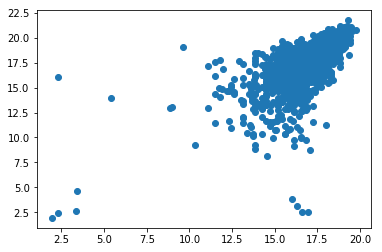

In [9]:
plt.scatter(movies['log_budget'],movies['log_revenue'])

In [45]:
# Make a scaler object
scaler = MinMaxScaler()

# This scales the data so the minimum value is 0 and the max is 1.
movies['log_budget'] = scaler.fit_transform(movies[['log_budget']])
movies['runtime'] = scaler.fit_transform(movies[['runtime']])
movies['log_revenue'] = scaler.fit_transform(movies[['log_revenue']])

print max(movies['log_budget'])
print min(movies['log_budget'])

1.0
0.0


#### Test Train Split

We're almost ready to perform some machine learning. All we have left to do is make a train set and a test set. You split your data into a training set which is used to teach your model. In order to see how well your model performs you set aside a test set and once you have trained your model you have your model make predictions from the test set and compare the predictions to the actual outcome.

Let's see how we can use python to make a test, train split of our dataframe.

In [11]:
# We use the sklearn package
# This makes a split in which 20% of the data is set aside for testing
# random_state = 440 ensures we get the same split everytime we run this code. Note the exact number
# does not matter just that we all use the same one.
train, test = train_test_split(movies, test_size=0.2, random_state = 440)

In [12]:
# We can examine train and test
train.head()

,budget,genres,release_date,runtime,revenue,log_budget,log_revenue
1422,30000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",2008-07-24,0.212121,68369434,0.857439,0.812745
2460,16000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",2009-01-09,0.154882,76514050,0.822144,0.818429
2945,14000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",2002-02-01,0.151515,6413915,0.814646,0.693243
622,70000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",2008-10-10,0.292929,113280098,0.905014,0.838244
2797,12000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",2007-10-12,0.218855,11293663,0.805991,0.721814


In [13]:
# However, in practice we should completely ignore the test set until we need it
test.head()

,budget,genres,release_date,runtime,revenue,log_budget,log_revenue
885,52000000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",2006-06-01,0.218855,204999686,0.888324,0.868197
2056,22000000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 53, ""...",2014-09-03,0.171717,15447154,0.840024,0.737629
876,75000000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 53, ""...",2001-10-30,0.161616,54249294,0.908888,0.801063
4342,5000000,"[{""id"": 18, ""name"": ""Drama""}]",2016-04-01,0.269360,23507567,0.756834,0.758833
183,130000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",2013-11-15,0.353535,847423452,0.939773,0.939863


#### Model: Simple Linear Regression

We'll start with a simple model, called simple linear regression. The idea here is that the underlying model behind the data is nothing more than a straight line:
$$
OutputData = \beta InputData + \delta.
$$

In our specific problem the $InputData$ will be the `budget` of the film, and the $OutputData$ will be the `revenue` of the film. This makes our model:
$$
\text{revenue} = \beta \text{budget} + \delta.
$$

We don't know what the actual $\beta$ and $\delta$ are, but we can estimate them using python (which uses underlying statistical techniques).

Please note! There are a number of underlying statistical assumptions that we are ignoring because this is not a statistics class. However, that does not imply that we should ignore the statistical assumptions and blindly apply this technique out in the real world (though many do).

Let's go ahead and make our model.

In [14]:
# This makes a model object and stores it in lin_reg
lin_reg = LinearRegression()

# This fits the model, The input goes first, then the output
lin_reg.fit(train[['log_budget']],train['log_revenue'])

# lin_reg.predict puts the input into the model and returns the output
Train_Line = lin_reg.predict(train[['log_budget']])

print "Beta Prediction: " + str(lin_reg.coef_)
print "Delta Prediction: " + str(lin_reg.intercept_)

Beta Prediction: [0.82432858]
Delta Prediction: 0.09125320371607759


Let's view the plot with the data points.

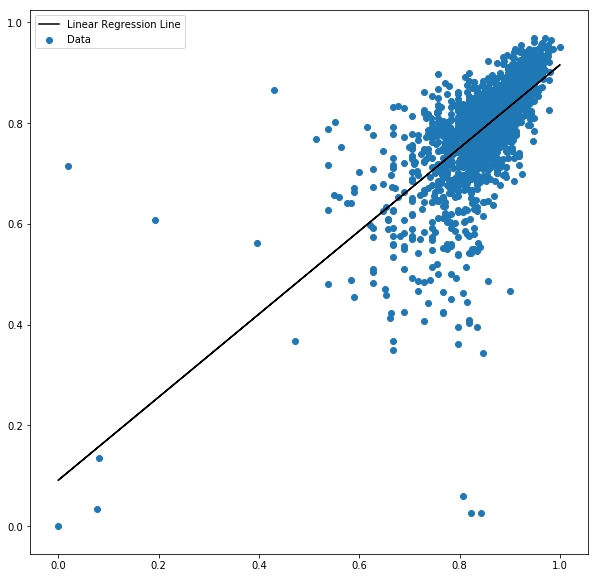

In [15]:
plt.figure(figsize = (10,10))
plt.scatter(train['log_budget'],train['log_revenue'],label = "Data")
plt.plot(train['log_budget'],Train_Line,'k',label = "Linear Regression Line")
plt.legend(loc="best")
plt.show()

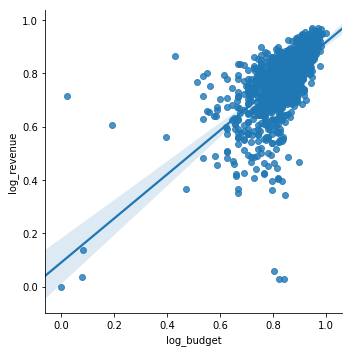

In [16]:
# We can check against the seaborn plot
sns.lmplot(data = train,x='log_budget',y='log_revenue')
plt.show()

We can now make a prediction on the test data and measure our model's goodness

In [18]:
# make a prediction on the test data
Test_Predict = lin_reg.predict(test[['log_budget']])
MSE1 = mean_squared_error(test['log_revenue'], Test_Predict)
R1 = r2_score(test['log_revenue'],Test_Predict)


# Check the mean squared error
print("Mean squared error: "
      + str(MSE1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % R1)

Mean squared error: 0.004880337777189598
Variance score: 0.51


This is a pretty nice MSE. However, the Variance score indicates that we can continue to improve our model!

### Multiple Linear Regression

Multiple linear regression extends simple linear regression to having more than one input variable. The model then becomes:
$$
OutputVariable = \sum\limits_{i=1}^{n} \beta_i \ InputVariable_i + \delta.
$$

Our multiple linear regression model will include the variable `runtime`.

In [37]:
# This makes a model object and stores it in lin_reg
Mult_lin_reg = LinearRegression()

# This fits the model, The input goes first, then the output
Mult_lin_reg.fit(train[['log_budget','runtime']],train['log_revenue'])

print "Beta Predictions (Beta_1, then Beta_2): " + str(Mult_lin_reg.coef_)
print "Delta Prediction: " + str(Mult_lin_reg.intercept_)

Beta Predictions (Beta_1, then Beta_2): [16.03448453  1.36650942]
Delta Prediction: 3.6852905104350846


In [38]:
# make a prediction on the test data
Mult_Test_Predict = Mult_lin_reg.predict(test[['log_budget','runtime']])


MSE2 = mean_squared_error(test['log_revenue'], Mult_Test_Predict)
R2 = r2_score(test['log_revenue'],Mult_Test_Predict)

# Check the mean squared error
print("Mean squared error: %.2f"
      % MSE2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % R2)

Mean squared error: 1.92
Variance score: 0.51


Adding `runtime` to our model didn't help our performance on the test set.

Let's see if we can improve by adding in `release_date` and `genre` data.

#### Linear Regression with Categorical Data

A categorical variable is one that has a set number of categories it can fall into. These are a tad bit trickier to perform linear regression with, and statisticians have developed a way to deal with them. Suppose you have two categories, $A$ or $B$. Then you create a dummy variable $1_A$ such that $1_A$ is $1$ if the data point belongs to category $A$ and $0$ else. Then the model becomes:
$$
OutputVariable = \beta_1 1_A + \delta.
$$

This can be extended to include more than just two categories to as many categories as you need, giving you one fewer dummy variable than category.

We'll exploit this format to `release_date`, and `genre`.

#### How should we split up `release_date`?

There are a number of ways we can split up `release_date` into categories. Let's try a few different ways and then decide which one might be best.

In [39]:
# In this chunk we break up release date into a number of different categories

# by month
month = []

# by day of the week
day_of_week = []

# by season
season = []

# by week of the month
week_of_month = []

# by week of the year
week_of_year = []

for i in movies.index:
    print movies['release_date'][i]
    date = movies['release_date'][i]
    month.append(date.month)
    week_of_year.append(date.isocalendar()[1])
    week_of_month.append(date.day // 7)
    day_of_week.append(date.weekday())   
    if date.month in [3,4,5]:
        season.append('Spring')
    elif date.month in [6,7,8]:
        season.append('Summer')
    elif date.month in [9,10,11]:
        season.append('Fall')
    else:
        season.append('Winter')
    
movies['release_month'] = month
movies['release_day_of_week'] = day_of_week
movies['release_season'] = season
movies['release_week_of_month'] = week_of_month
movies['release_week_of_year'] = week_of_year

2009-12-10 00:00:00
2007-05-19 00:00:00
2015-10-26 00:00:00
2012-07-16 00:00:00
2012-03-07 00:00:00
2007-05-01 00:00:00
2010-11-24 00:00:00
2015-04-22 00:00:00
2009-07-07 00:00:00
2016-03-23 00:00:00
2006-06-28 00:00:00
2008-10-30 00:00:00
2006-06-20 00:00:00
2013-07-03 00:00:00
2013-06-12 00:00:00
2008-05-15 00:00:00
2012-04-25 00:00:00
2011-05-14 00:00:00
2012-05-23 00:00:00
2014-12-10 00:00:00
2012-06-27 00:00:00
2010-05-12 00:00:00
2013-12-11 00:00:00
2007-12-04 00:00:00
2005-12-14 00:00:00
2016-04-27 00:00:00
2012-04-11 00:00:00
2015-06-09 00:00:00
2012-10-25 00:00:00
2004-06-25 00:00:00
2013-04-18 00:00:00
2010-03-03 00:00:00
2006-05-24 00:00:00
2013-06-20 00:00:00
2009-06-19 00:00:00
2014-06-25 00:00:00
2013-03-07 00:00:00
2014-04-16 00:00:00
2010-12-10 00:00:00
2011-06-11 00:00:00
2011-06-16 00:00:00
2010-06-16 00:00:00
2009-05-20 00:00:00
2015-04-01 00:00:00
2013-06-20 00:00:00
2014-05-15 00:00:00
2013-05-05 00:00:00
2013-02-27 00:00:00
2013-05-10 00:00:00
2010-05-19 00:00:00


2012-02-02 00:00:00
2002-08-09 00:00:00
2009-10-23 00:00:00
2003-09-26 00:00:00
2009-09-08 00:00:00
2002-11-27 00:00:00
2007-04-05 00:00:00
2012-03-07 00:00:00
2015-02-16 00:00:00
2006-07-21 00:00:00
2007-04-12 00:00:00
2013-08-01 00:00:00
2015-07-10 00:00:00
2009-08-14 00:00:00
2012-10-04 00:00:00
2005-08-25 00:00:00
2004-02-20 00:00:00
2013-12-25 00:00:00
2008-07-10 00:00:00
2002-09-26 00:00:00
2009-07-24 00:00:00
2002-08-07 00:00:00
2013-01-08 00:00:00
2011-03-15 00:00:00
2002-05-24 00:00:00
2015-04-16 00:00:00
2001-05-15 00:00:00
2001-09-04 00:00:00
2009-11-06 00:00:00
2013-09-02 00:00:00
2008-10-07 00:00:00
2012-09-07 00:00:00
2007-12-17 00:00:00
2008-10-10 00:00:00
2016-01-14 00:00:00
2015-11-25 00:00:00
2010-09-15 00:00:00
2012-05-17 00:00:00
2008-09-05 00:00:00
2008-04-03 00:00:00
2013-09-02 00:00:00
2010-02-26 00:00:00
2016-01-21 00:00:00
2011-09-23 00:00:00
2008-11-20 00:00:00
2002-02-15 00:00:00
2013-08-07 00:00:00
2008-12-18 00:00:00
2010-03-26 00:00:00
2014-09-12 00:00:00


2008-12-04 00:00:00
2010-02-15 00:00:00
2008-08-07 00:00:00
2001-10-14 00:00:00
2007-01-25 00:00:00
2013-07-18 00:00:00
2015-07-01 00:00:00
2010-09-16 00:00:00
2005-05-16 00:00:00
2008-05-12 00:00:00
2009-01-16 00:00:00
2007-05-16 00:00:00
2011-12-30 00:00:00
2002-03-08 00:00:00
2009-06-08 00:00:00
2010-03-12 00:00:00
2007-03-16 00:00:00
2001-07-24 00:00:00
2001-02-02 00:00:00
2012-10-25 00:00:00
2007-05-22 00:00:00
2006-10-06 00:00:00
2000-04-21 00:00:00
2011-09-30 00:00:00
2010-08-06 00:00:00
2005-09-02 00:00:00
2002-09-01 00:00:00
2015-02-20 00:00:00
2000-11-22 00:00:00
2012-09-07 00:00:00
2004-09-08 00:00:00
2004-09-03 00:00:00
2014-03-14 00:00:00
2010-12-29 00:00:00
2011-02-11 00:00:00
2010-12-02 00:00:00
2001-01-12 00:00:00
2016-03-17 00:00:00
2000-12-15 00:00:00
2014-10-09 00:00:00
2014-02-14 00:00:00
2016-06-24 00:00:00
2004-01-22 00:00:00
2014-09-10 00:00:00
2007-11-21 00:00:00
2015-01-21 00:00:00
2014-06-14 00:00:00
2001-06-29 00:00:00
2006-12-19 00:00:00
2006-10-15 00:00:00


Now we have to remake our train and test datasets so they include the new dummy variables.

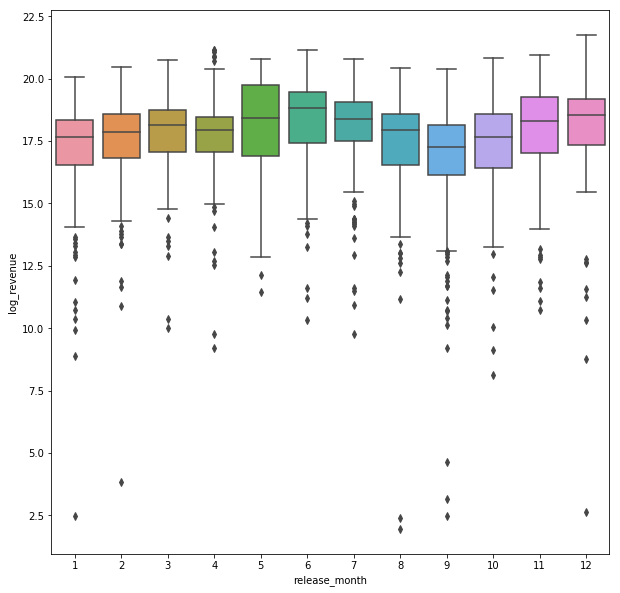

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'release_month',y='log_revenue',data = movies)
plt.show()

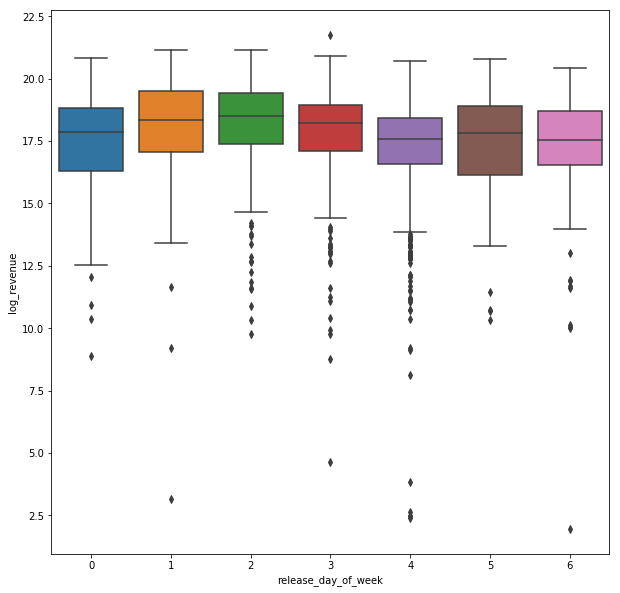

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'release_day_of_week',y='log_revenue',data = movies)
plt.show()

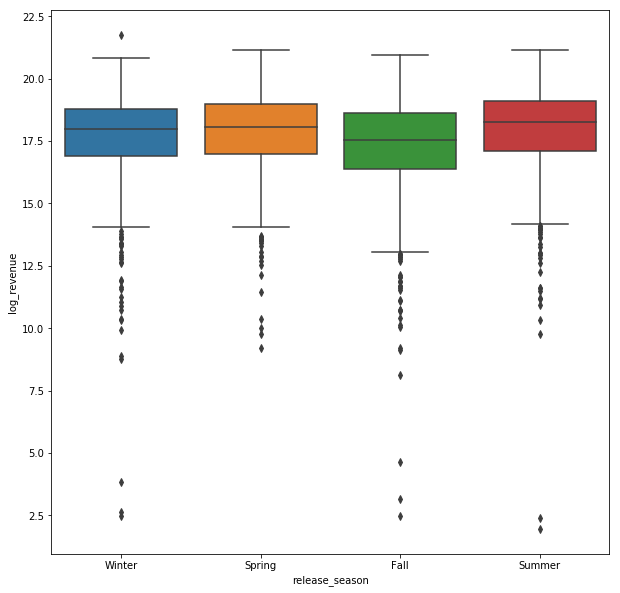

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'release_season',y='log_revenue',data = movies)
plt.show()

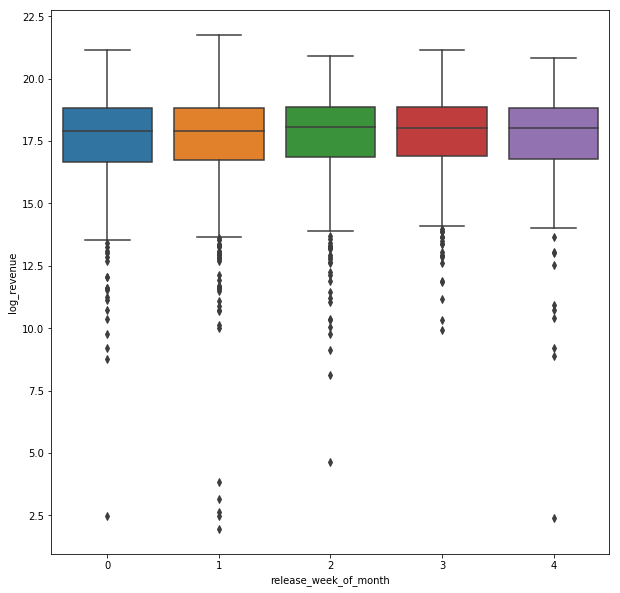

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'release_week_of_month',y='log_revenue',data = movies)
plt.show()

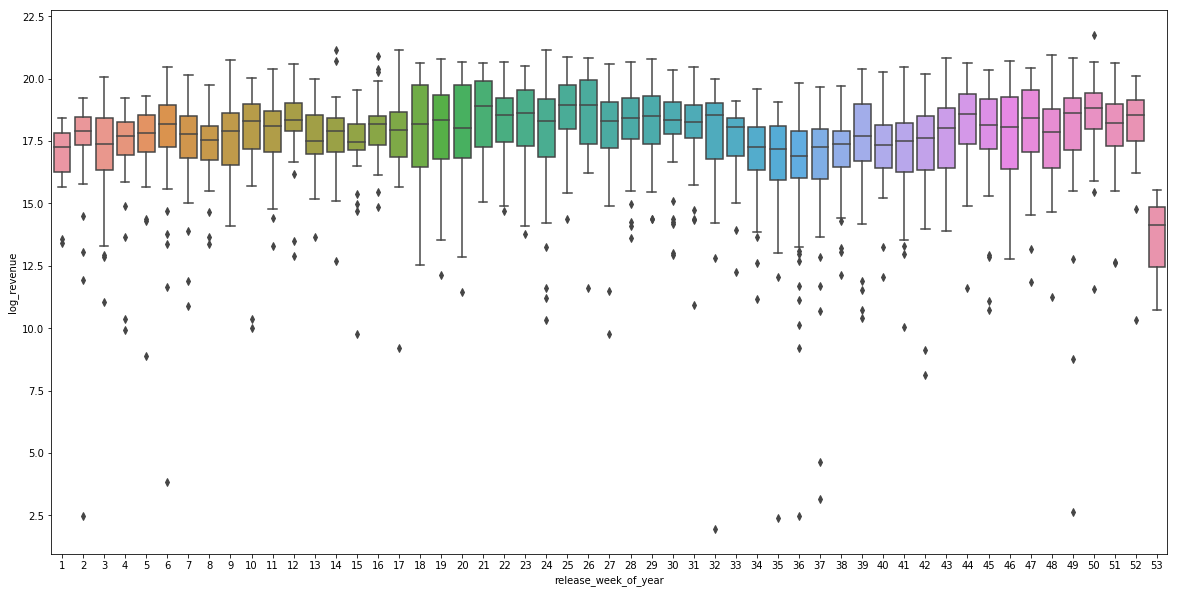

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'release_week_of_year',y='log_revenue',data = movies)
plt.show()

Let's break our date data down into Seasons.

Now let's look at the `genres`.

In [45]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

The variable returns a dictionary of genres. It would be hard to extract every single genre from every movie in a simple way. What we will do is assume that the first genre listed in the list is the primary genre of the film. We will use this to make a new categorical variable called `primary_genre`.

In [46]:
# This code will create the primary_genre variable

import ast

primary_genre = []

for i in movies.index:
    if len(ast.literal_eval(movies['genres'][i])) > 0:
        genre = ast.literal_eval(movies['genres'][i])[0]['name']
    else:
        genre = 'None'
    
    
    primary_genre.append(genre)

movies['primary_genre'] = primary_genre

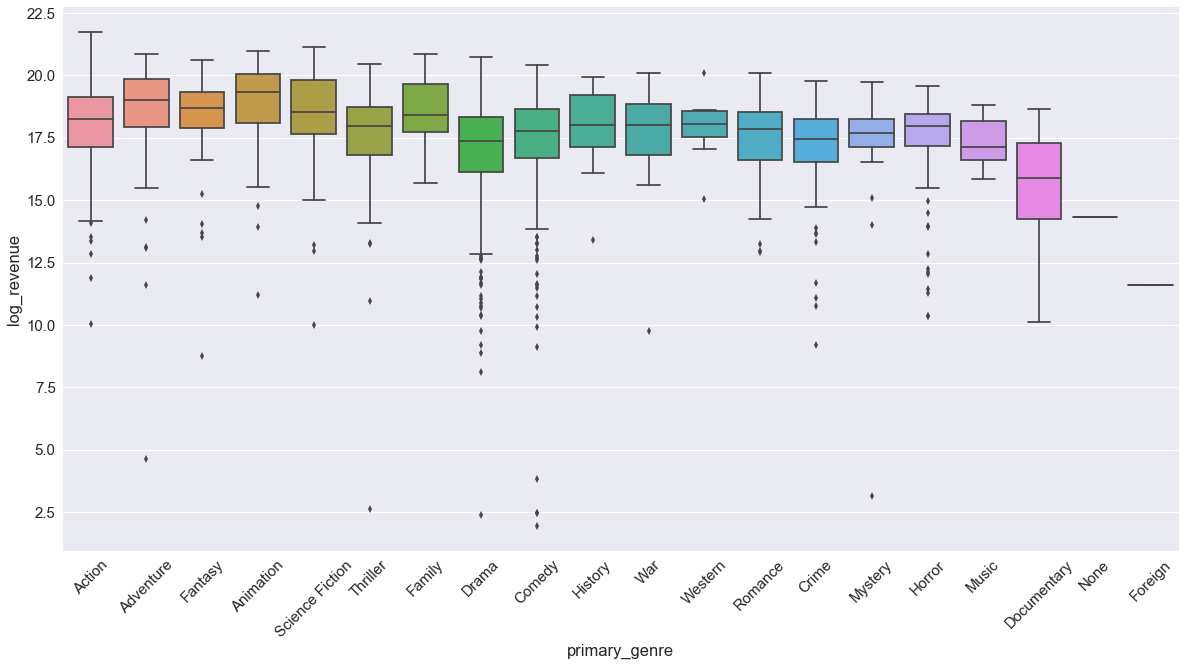

In [47]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.5)

sns.boxplot(x='primary_genre',y='log_revenue',data=movies)

plt.xticks(rotation = 45)
plt.show()

It seems to be a bit of a toss-up, but `primary_genre` may have an effect on `revenue` so we can include it in our next model.

Now we can adjust our multiple linear regression model to include the categorical variables we've made: `release_season` and `primary_genre`. Let's see how to do that.

In [48]:
# Creates dummy variables for primary genre
Genre_Dummies = pd.get_dummies(movies['primary_genre'])
Genre_Dummies = Genre_Dummies.drop(columns = ['None'])

# Creates dummy variables for release_week_of_year
Season_Dummies = pd.get_dummies(movies['release_season'])
Season_Dummies = Season_Dummies.drop(columns = ['Winter'])

In [49]:
# merge the dummy variables into our movies dataset
movies = movies.join(Genre_Dummies)
movies = movies.join(Season_Dummies)

Now we can use all of this to make one more model that includes our two categorical variables.

In [50]:
# Remake our test train split
train, test = train_test_split(movies, test_size=0.2, random_state = 440)

# Make a list of predictor column names
Predictors = ['log_budget','runtime']
#Predictors.extend(list(Week_Of_Year_Dummies.columns))
Predictors.extend(list(Genre_Dummies.columns))
Predictors.extend(list(Season_Dummies.columns))

# Make list containing outcome column name
Outcome = 'log_revenue'

# Make the model
# This makes a model object and stores it in lin_reg
fin_lin_reg = LinearRegression()

# This fits the model, The input goes first, then the output
fin_lin_reg.fit(train[Predictors],train[Outcome])

# Make Predictions
prediction = fin_lin_reg.predict(test[Predictors])

# Check error
fin_MSE = mean_squared_error(test[Outcome], prediction)
fin_R = r2_score(test[Outcome], prediction)

# Check the mean squared error
print("Mean squared error: %.2f"
      % fin_MSE)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fin_R)



Mean squared error: 1.86
Variance score: 0.53


Our lowest MSE yet!. This is great, but how do we know if it is actually good?

This is a hard question. Since 1.86 is small if our data ranges from 0 to 1 million, but bad if our data ranges from 0 to 2. Let's look at the actual range of `log_revenue`.

In [51]:
movies['log_revenue'].describe()

count    2282.000000
mean       17.597429
std         2.063208
min         1.945910
25%        16.795911
50%        17.964185
75%        18.858958
max        21.748578
Name: log_revenue, dtype: float64

We should also keep in mind that MSE is on the order of squares. So let's take the square root.

In [52]:
print np.sqrt(fin_MSE)

print "\n"

print np.sqrt(fin_MSE)/21.7

1.3620666535919175


0.06276804855262293


So it seems that our error isn't too shabby!

We can always make it better, and our $R^2$ value indicates that we're still missing about .5 of the variability in the `log_revenue`.

Note we swept a few machine learning details under the rug when it came to model selection, and we haven't even scratched the surface on different model type we could use. For more information look into the two books listed at the beginning of this notebook.


In [32]:
CrazyRichAsians = pd.read_csv("Data\CrazyRichAsians.csv")

In [33]:
CrazyRichAsians.head()

,budget,primary_genre,release_date,runtime
0,30000000,Comedy,2018-08-15,121


In [34]:
CrazyRichAsians['log_budget'] = np.log(CrazyRichAsians['budget'])
CrazyRichAsians['log_budget'] = scaler.fit_transform(CrazyRichAsians[['log_budget']])
CrazyRichAsians['runtime'] = scaler.fit_transform(CrazyRichAsians[['runtime']])
CrazyRichAsians['release_date'] = pd.to_datetime(CrazyRichAsians['release_date'])
CrazyRichAsians['release_season'] = "Summer"
CrazyRichAsians['revenue'] = 0
